# Car prices prediction

## Intruduction 

In this mission I will be using K-nearers Neighbours algorythm to predict car prices. The dataset comes from [Link](https://archive.ics.uci.edu/ml/datasets/automobile) and contains different parameters of second hand cars along with their prices. I will be building a model calculating Euclidean distance for various attributes and using k-fold validation I will select the best parameters of the model.

### Summary of results

The dataset is quite small and the lowest error can be obtained for 5 best performing attributes taking k=3 neighbors.

## Data exploration

Lets import libraries we will be using and read data to pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [3]:
cars = pd.read_csv('data//imports-85.data',header=None)

In [4]:
cars

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Our dataset doesn't have any column names so lets determine which columns will be useful for our prediction and can be used as the attributes.

## Data cleaning

Lets drop invalid columns. Here is the column's description from the Repository.

Attribute Information:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.



We can use numeric data as attributes based on which the model can be trained and price predicted.

We can leave columns such as:
- symboling
- normalized-losses
- num-of-doors
- wheel-base
- curb-weight
- engine-size
- stroke
- compression-ratio
- horsepower
- peak-rpm
- city-mpg
- highway-mpg
- price

In [5]:
# copying valid columns
cars_clean = cars[[0,1,5,9,13,16,20,21,22,23,24,25]].copy()

# replacing '?' with NaN
cars_clean = cars_clean.replace('?',np.nan)

# replacing column's names
columns = ['symboling', 'normalized-losses', 'num-of-doors','wheel-base',
           'curb-weight','engine-size','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price']

cars_clean.columns = columns

# cleaning 'num-of-doors' column
cars_clean['num-of-doors'] = cars_clean['num-of-doors'].str.replace('two','2')
cars_clean['num-of-doors'] = cars_clean['num-of-doors'].str.replace('four','4')

cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
num-of-doors         203 non-null object
wheel-base           205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 19.3+ KB


We have done a bit of data cleaning lets now drop NaN values. Then we can convert columns to numeric type.

In [6]:
cars_clean.drop(['normalized-losses'],axis=1,inplace=True)
cars_clean.dropna(subset=['price','horsepower','num-of-doors'],inplace=True)

In [7]:
cars_clean = cars_clean.astype(float)
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 11 columns):
symboling            197 non-null float64
num-of-doors         197 non-null float64
wheel-base           197 non-null float64
curb-weight          197 non-null float64
engine-size          197 non-null float64
compression-ratio    197 non-null float64
horsepower           197 non-null float64
peak-rpm             197 non-null float64
city-mpg             197 non-null float64
highway-mpg          197 non-null float64
price                197 non-null float64
dtypes: float64(11)
memory usage: 18.5 KB


Now we have data consistency. Only numeric columns without any null values. Lets now normalize data so they all range from 0 to 1.

In [8]:
cars_clean_normalized = cars_clean.apply(lambda col: (col-col.min())/(col.max()-col.min()))
cars_clean_normalized['price'] = cars_clean['price']
cars_clean_normalized.describe()

,symboling,num-of-doors,wheel-base,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.568528,0.568528,0.357150,0.415228,0.249037,0.195533,0.259832,0.395110,0.337563,0.384985,13279.644670
std,0.252385,0.496544,0.178158,0.202398,0.158163,0.246131,0.175884,0.196341,0.178830,0.179902,8010.334218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.400000,0.000000,0.230321,0.254849,0.135849,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.600000,1.000000,0.303207,0.359193,0.218868,0.125000,0.219626,0.428571,0.305556,0.368421,10345.000000
75%,0.800000,1.000000,0.460641,0.561288,0.316981,0.150000,0.317757,0.551020,0.472222,0.473684,16503.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


## K-nearest neighbors model
It looks like our dataset if well prepared to perform k-nearest neighbors. Lets create a function which takes 3 parameters: df object, training column, and target column which can be used to build our model.

In [9]:
def knn_train_test(df,training,target,k):
    split = round(df.shape[0]*0.8)
    np.random.seed(1)
    df = df.loc[np.random.permutation(df.index)]
    df_train = df.iloc[:split].copy()
    df_test = df.iloc[split:].copy()
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(df_train[[training]],df_train[target])
    prediction = knn.predict(df_test[[training]])
    return mean_squared_error(df_test[target],prediction,squared=False)
    

### Model validation

First lets start with single attribute and different k parameters to see how our model performs.

In [10]:
# parameters
attributes = ['symboling', 'num-of-doors','wheel-base',
           'curb-weight','engine-size','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg']
target = 'price'
k_val = [1,3,5,7,9]
model_performance = {}

# models performance test with grid search
for col in attributes:
    k_score=[]
    for k in k_val:
        k_score.append(knn_train_test(cars_clean_normalized,col,target,k))
    model_performance[col] = k_score
        

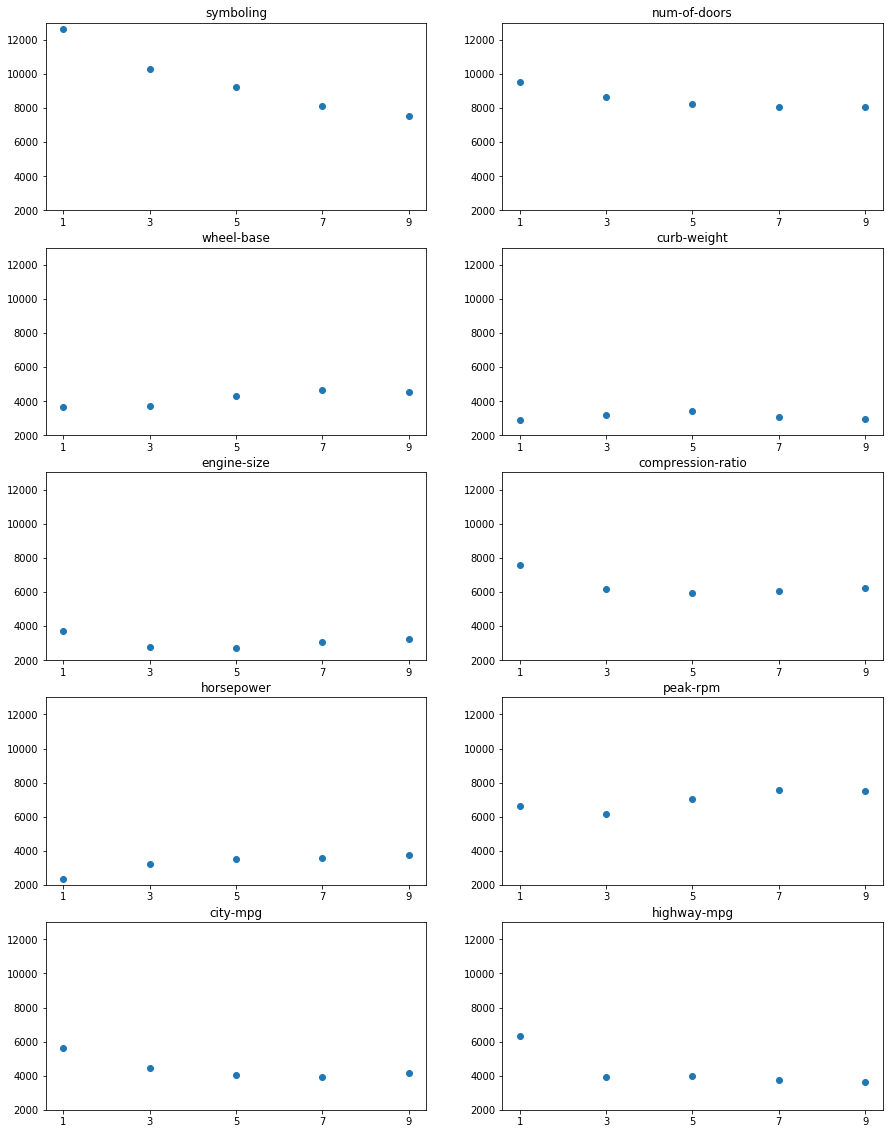

In [11]:
# visualize the results
fig = plt.figure(figsize=(15, 20))
for index, col in enumerate(attributes):
    ax = fig.add_subplot(5,2,index+1)
    ax.scatter(k_val ,model_performance[col])
    ax.set_xticks(k_val)
    ax.set_ylim(2000,13000)
    ax.set_title(col)

Columns with the best performance are:
 - engine-size
 - horsepower
 - curb_weight
 - heighway-mpg
 
Lets now determine the best number of attributes to train our model and obtain the highest accuracy. Lets take 5-neigbours for now and print results of each attribute.

In [12]:
performance_5k=[]
for key,val in model_performance.items():
    performance_5k.append((val[2],key))
    
performance_5k.sort()
performance_5k

[(2701.1652380180153, 'engine-size'),
 (3426.1758764561773, 'curb-weight'),
 (3504.6604259954293, 'horsepower'),
 (4012.5747520155705, 'highway-mpg'),
 (4036.3382166233737, 'city-mpg'),
 (4284.631461158441, 'wheel-base'),
 (5902.06603148423, 'compression-ratio'),
 (7034.690585217206, 'peak-rpm'),
 (8211.556359555345, 'num-of-doors'),
 (9229.412730990762, 'symboling')]

Above we can see Root mean squared errors for each column used as a training data. So far we have been using only single attribute to train our model lets now use more columns to see if it will reduce our error. To do that we need to slightly modify our function to deal with multiple attributes.

In [13]:
# multivariate model and 5-neigbours
def knn_train_test_multi(df,training,target,k=5):
    split = round(df.shape[0]*0.8)
    np.random.seed(1)
    df = df.loc[np.random.permutation(df.index)]
    df_train = df.iloc[:split].copy()
    df_test = df.iloc[split:].copy()
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(df_train[training],df_train[target])
    prediction = knn.predict(df_test[training])
    return mean_squared_error(df_test[target],prediction,squared=False)

Lets use the best 2, 3, 4 and 5 columns as well as all of them to compare against.

In [28]:
# testing model for different number of columns
best_model = {}

for n_col in range(2,6):
    attributes_model = [performance_5k[n][1] for n in range(0,n_col)]
    rmse = knn_train_test_multi(cars_clean_normalized,attributes_model,target)
    best_model['best_{}_attributes'.format(n_col)] = rmse
    
# testing model for all columns
best_model['all_attributes'] = knn_train_test_multi(cars_clean_normalized,attributes,target)
best_model

{'best_2_attributes': 2715.616232658238,
 'best_3_attributes': 2701.0512437824023,
 'best_4_attributes': 2634.44767996283,
 'best_5_attributes': 2597.1154766344835,
 'all_attributes': 2892.449928117454}

We got the best results using the best 5 columns. For all of them we have been using k=5 as neighbors parameter. Lets now run our best 5-attributes model on varies k. 

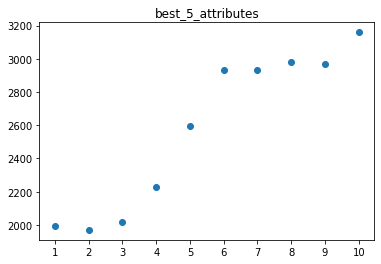

In [16]:
k_val = range(1,11)
best_5_attributes = [performance_5k[n][1] for n in range(0,5)]
rmse_res = []
for k in k_val:
    rmse = knn_train_test_multi(cars_clean_normalized,best_5_attributes,target,k)
    rmse_res.append(rmse)
plt.scatter(x=k_val,y=rmse_res)
plt.xticks(k_val)
plt.title('best_5_attributes')
plt.show()

As we see our model may get better results for lower k. Taking 1 or 2 k may sound a bit to less but we can take k=3 and get quite low error. Lets perform k-fold validation and measure also rmse standard diviation.

In [49]:
# k-fold model validation
def cross_validation(df,target,k,n_fold):
    print('Model validation for ' + str(k) + '-neighbors using ' + str(n_fold) + ' folds:')
    for n_col in range(2,11):
        attributes_model = [performance_5k[n][1] for n in range(0,n_col)]
        kf = KFold(n_splits=n_fold,shuffle=True,random_state=1)
        knn = KNeighborsRegressor(n_neighbors=k)
        rmse = cross_val_score(knn,df[attributes_model],df[target],scoring='neg_root_mean_squared_error',cv=kf)
        fold_rmse = np.abs(rmse)
        rmse_mean = np.mean(fold_rmse)
        std_rmse = np.std(fold_rmse)
        print(str(n_col), "attributes: ", "avg RMSE: ", str(round(rmse_mean,1)), "std RMSE: ", str(round(std_rmse,1)))
    print('\n')
        
cross_validation(cars_clean_normalized,target,3,5)    

Model validation for 3-neighbors using 5 folds:
2 attributes:  avg RMSE:  3122.9 std RMSE:  477.6
3 attributes:  avg RMSE:  3024.0 std RMSE:  733.3
4 attributes:  avg RMSE:  2846.8 std RMSE:  809.9
5 attributes:  avg RMSE:  2897.0 std RMSE:  762.0
6 attributes:  avg RMSE:  3093.4 std RMSE:  1017.3
7 attributes:  avg RMSE:  3222.9 std RMSE:  969.8
8 attributes:  avg RMSE:  2955.4 std RMSE:  724.8
9 attributes:  avg RMSE:  3735.7 std RMSE:  976.1
10 attributes:  avg RMSE:  3979.0 std RMSE:  838.1




It is important to find a trade off between bias and variance in our model. High number of attributes increases variance while low number of attributes make our model bias.
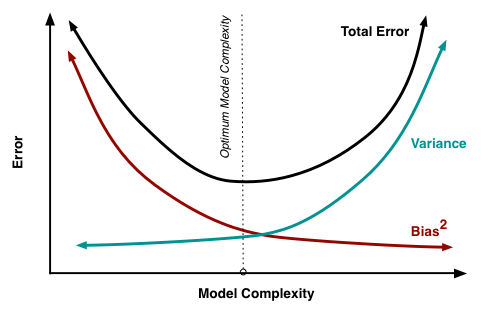
## Conclusion

Our model has only around 200 rows which is not to much and high k-value cannot be used as its increases error. We have different attributes which can be used but using too much of them may increase model's variance. It looks like the optimal solution is to use 5 best performing attributes and k=3.